# Regresion lineal para precedir gastos medicos de un paciente

Este codigo crea un modelo de regresion lineal para predecir los gastos medicos de un paciente, apartir de un data frame con las siguientes variables: 

age: edad del beneficiario principal                                                                                                                   
sex: género del contratista de seguros, femenino, masculino                  
bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos relativamente altos o bajos en relación con la altura,
índice objetivo de peso corporal (kg/m^2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9.                    
children: Número de hijos cubiertos por el seguro médico / Número de dependientes                    
smoker: fumar                      
region: zona residencial del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.                       
charges: Costos médicos individuales facturados por el seguro médico

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.info())    # Resumen del data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
print(df.describe())        # resumen estadistico

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Inicialmente analizamos la variable a predecir (variable = charges)

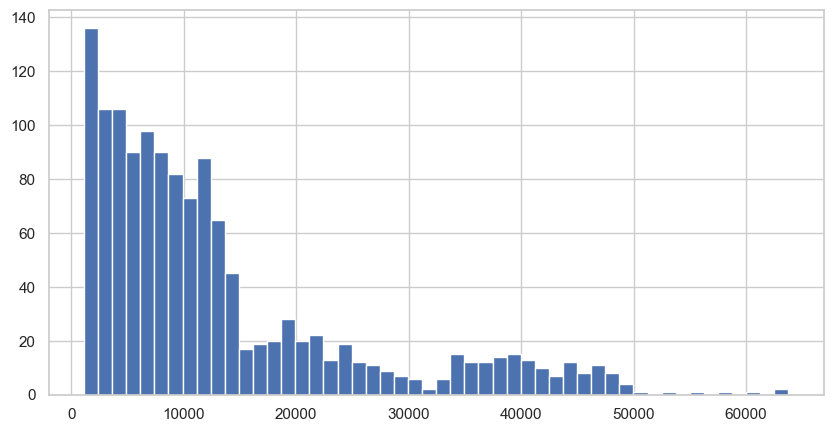

In [5]:
plt.figure(figsize=(10,5))
df.charges.hist(bins=50);

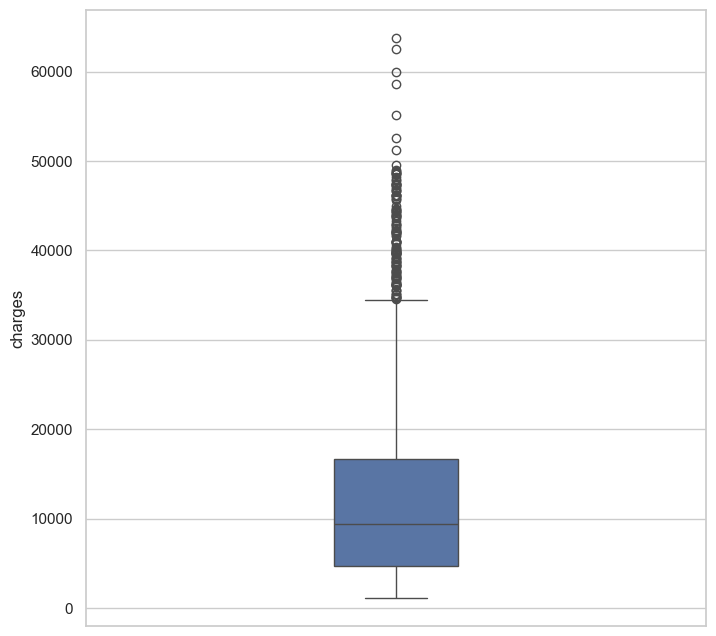

In [6]:
plt.figure(figsize=(8,8))
sns.boxplot(df.charges,width=0.2);

De los graficos anteriores podemos notar los valores atipicos, el histograma presenta frecuencia en su mayoria hasta 50000, despues de este valor existen pocos datos.  
En el boxplot notamos muchos valores atipicos despues de 35000, pero de 35000 a 50000 existen muchos datos, los valores atipicos mas criticos son los que estan por encima de 50000, en este caso los vamos a eliminar solo estos, esta es una accion muy peligrosa que se debe hacer con seguridad de no afectar el proyecto

In [7]:
df = df[df.charges<50000]       # eliminacion de las filas con charges mayor a 50000
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB
None


## Analisis de correlacion

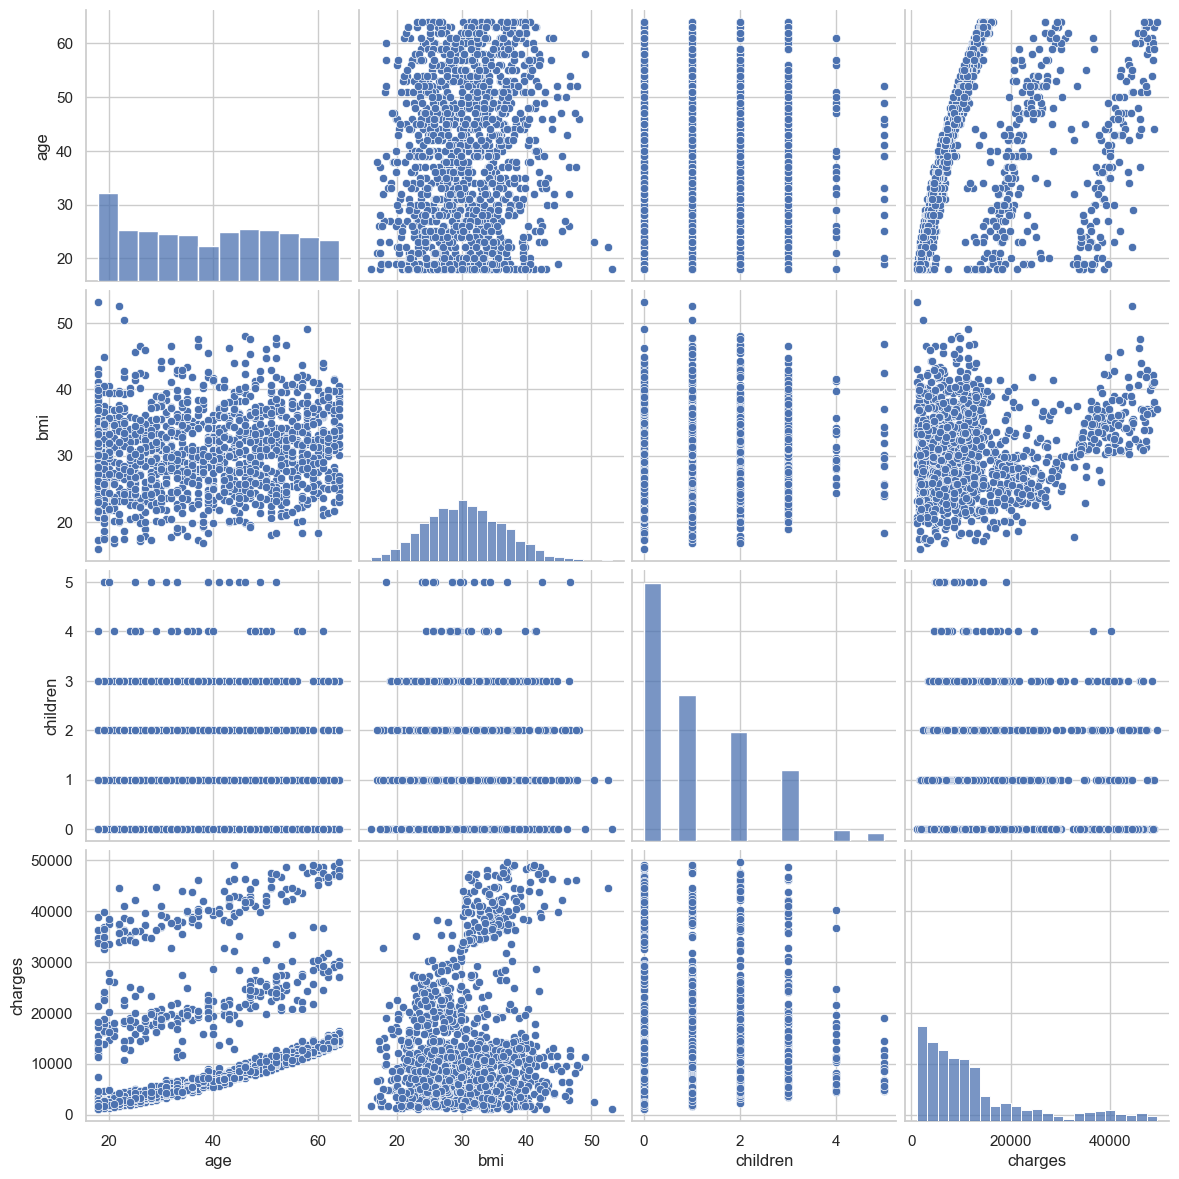

In [8]:
sns.pairplot(df,height=3);

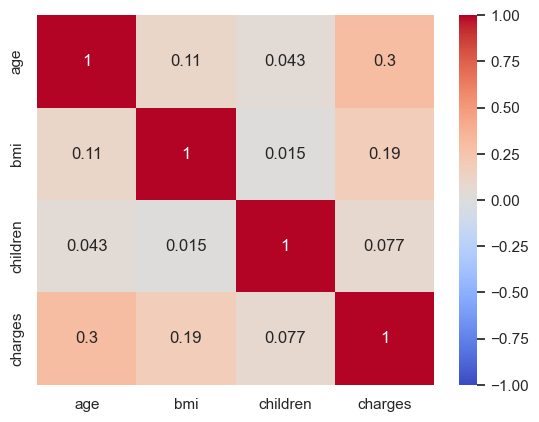

In [9]:
cols = ["age","bmi","children","charges"]
cor = df[cols].corr()
sns.heatmap(cor, vmin=-1, vmax=1, annot=True, yticklabels=cols, xticklabels=cols, cmap='coolwarm')
plt.show()

Hasta el momento la correlacion no nos proporciona una relacion directa para crear un modelo, en este caso es bueno analizar las variables categoricas, pero debes convertirlas a numericas, por ejemplo 0 si no es fumador y 1 si es fumador, igual para todas las demas variables

In [10]:
# pandas ya tiene una funcion para convertir las variables categoricas

df2 = pd.get_dummies(df, columns=["sex","smoker","region"], dtype=int, drop_first=True)          # convertimos las variables categoricas a 0 y 1
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


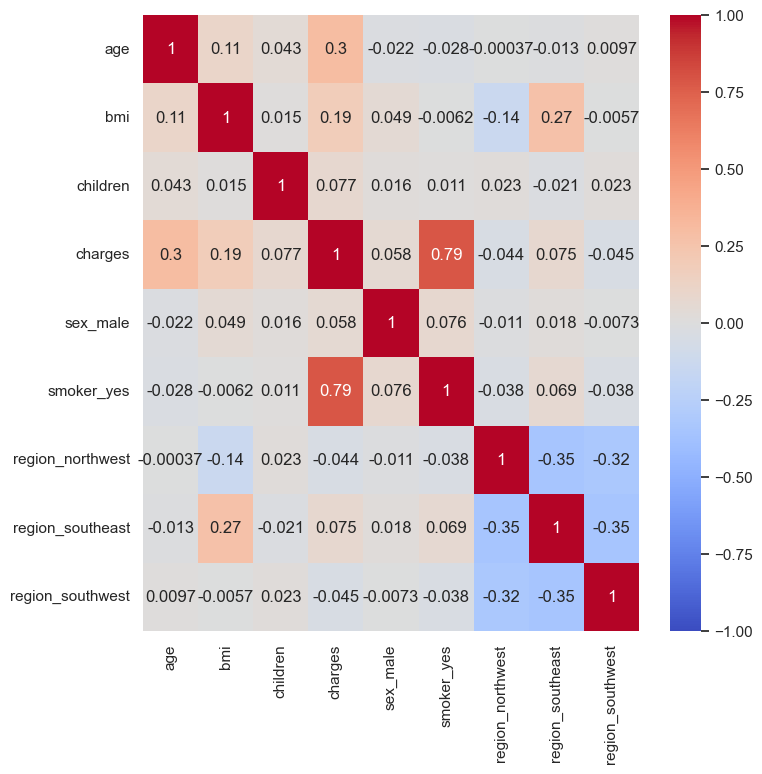

In [11]:
plt.figure(figsize=(8,8))
cols2 = df2.columns
cor2 = df2[cols2].corr()
sns.heatmap(cor2, vmin=-1, vmax=1, annot=True, yticklabels=cols2, xticklabels=cols2, cmap='coolwarm')
plt.show()

Comprobamos correlacion entre los gastos medicos y la variable fumador, con un valor de 0.79, lo podemos visualizar en un pairplot que depende de esta variable

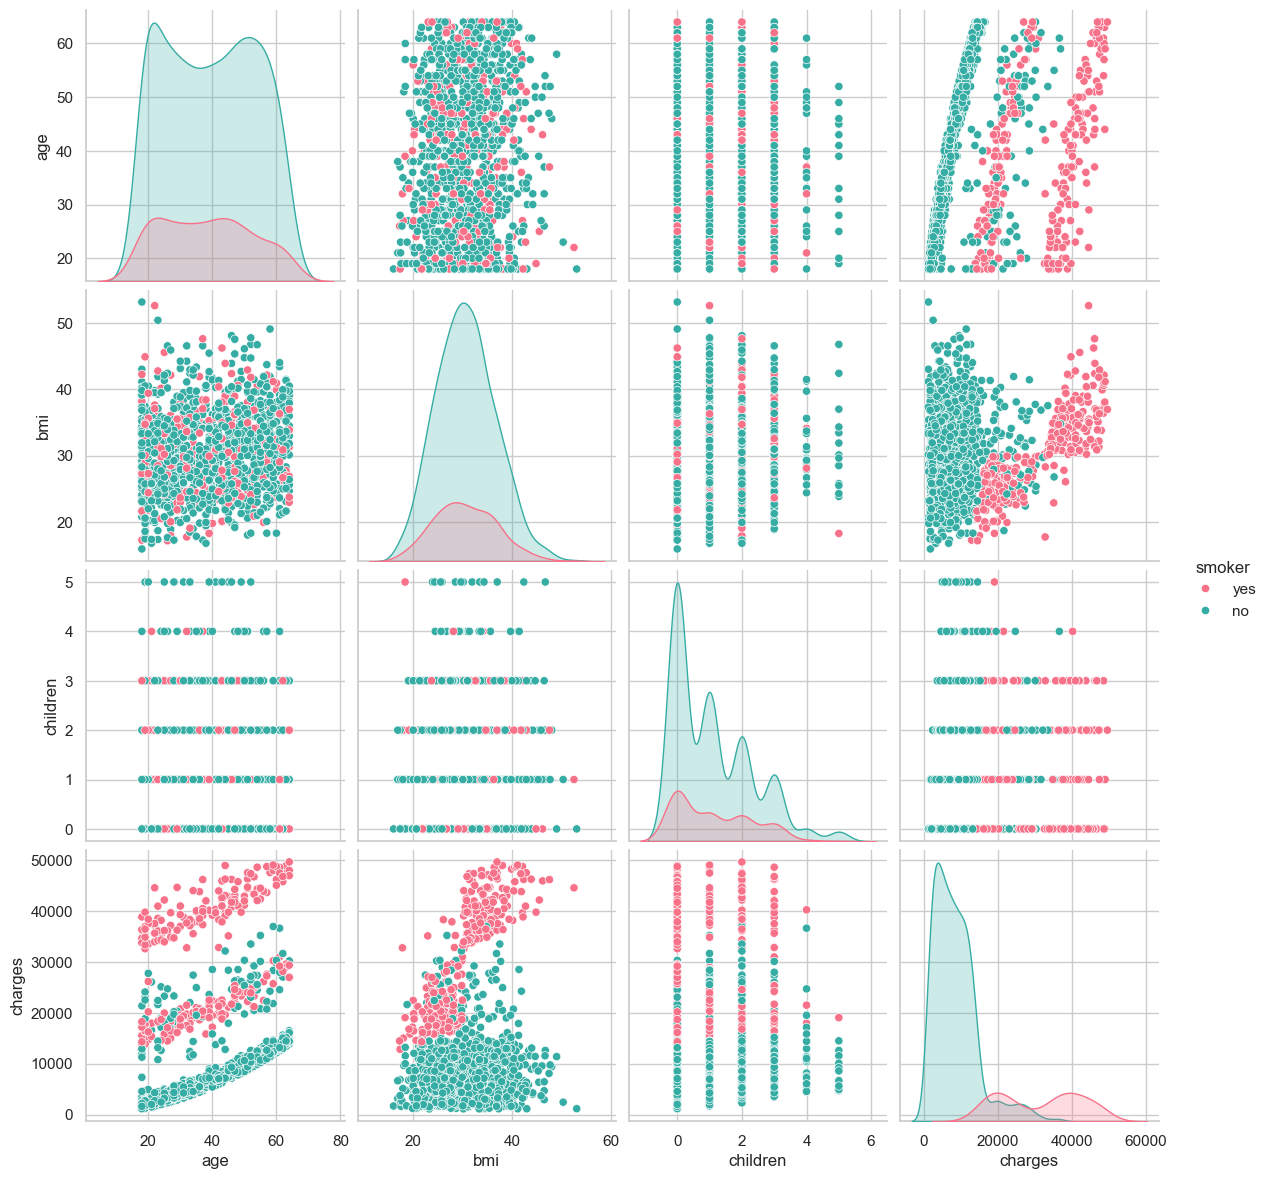

In [12]:
sns.pairplot(df, hue="smoker", palette="husl", height=3);

## Creacion del modelo

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# inicialmente definimos las columnas a utilizar en el modelo
x_cols = list(set(df2.columns)-set(["charges"]))         # todas las columnas del data frame menos la variable a predecir
y_col = ["charges"]         # variable a predecir

X = df2[x_cols].values
y = df2[y_col].values

# train_test_split recibe x,y y crea un paquete de 75% para entreno y 25% para prueba

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_x = StandardScaler().fit(X)     # valores de x estandarizados
sc_y = StandardScaler().fit(y)      # valores de y estandarizados

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluacion del modelo

In [15]:
mse = mean_squared_error(y_test, y_pred) 
print("El error cuadrado promedio es = ", mse)
r2 = r2_score(y_test, y_pred)
print("El coeficiente de determinacion es = ", r2)
# Un r2 por encima del 75% es considerado bueno, muy bueno por encima de 80% y excelente por encima de 90%. Un r2 de 100% representa un modelo sobreajustado, no es bueno 

El error cuadrado promedio es =  0.2697896309061744
El coeficiente de determinacion es =  0.7697796559991739


Un r2 por encima del 75% es considerado bueno, muy bueno por encima de 80% y excelente por encima de 90%. Un r2 de 100% representa un modelo sobreajustado, no es bueno 

In [16]:
# A continuacion realizamos un resumen y analisis del modelo
from regressors import stats

model.intercept_ = model.intercept_[0]      # extraemos solo el valor de la intercepcion de la regresion lineal
model.coef_ = model.coef_.reshape(-1)       # coef tiene los coeficientes del modelo es decir los PESOS (w0,w1,w2,w3 ...)

y_test = y_test.reshape(-1)         # hace falta redimensionar para la lectura y analisis

print(stats.summary(model, X_test, y_test, x_cols))

Residuals:
    Min      1Q  Median     3Q    Max
-1.8653 -0.1453  0.0663 0.2248 0.9333


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.009139    0.028641  -0.3191  0.749858
age               0.301648    0.028590  10.5509  0.000000
bmi               0.166027    0.029815   5.5686  0.000000
sex_male         -0.015340    0.028896  -0.5309  0.595860
region_southwest -0.040823    0.033381  -1.2230  0.222212
region_southeast -0.053562    0.034144  -1.5687  0.117667
children          0.063857    0.029698   2.1502  0.032260
region_northwest -0.022473    0.033586  -0.6691  0.503884
smoker_yes        0.790379    0.027865  28.3647  0.000000
---
R-squared:  0.76978,    Adjusted R-squared:  0.76410
F-statistic: 135.42 on 8 features
None


Analisis de stats.summary:

Recordemos que una regresion multivariable tiene la forma => y = w0 + w1x1 + w2x2 + w3x3 + ... + wnxn    
En stats.summary la columna Estimate corresponde a estos coeficientes, es decir, w0 w1 w2 w3 .... siendo w0 el intercepto

En conclucion lo importante de este resumen estadistico es observar p value y R-squared con Adjusted R-squared, R-squared es el mismo coeficiente de determinacion y el ajustado nos indica si es necesario quitar variables del modelo, en caso tal que varien mucho estos dos valores

Finalmente graficamos los residuales, esto no permite observar que tan distante puede estar la linea o el modelo de los valores reales. En el siguiente grafico la linea de regresion esta ubicada en y = 0

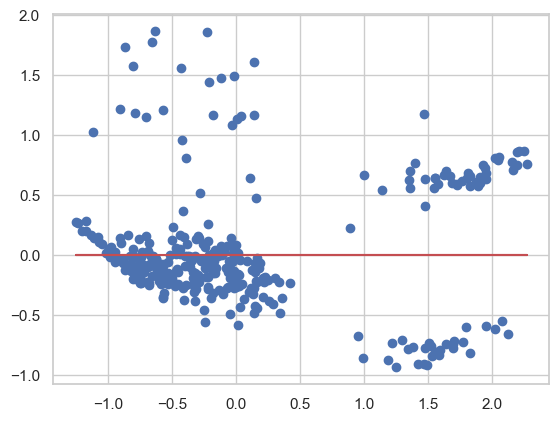

In [17]:
residuales = np.subtract(y_test, y_pred.reshape(-1))        # subtract() resta los dos arrays
plt.scatter(y_pred, residuales);
y_values = np.zeros_like(y_pred)
plt.plot(y_pred,y_values,"r");      # linea de prediccion


Analisis: Podemos notar que entre -1 y 0.5 existen muchos valores sobre la linea de predicion sin embargo tambien hay valores por encima de esta linea, algunos muy alejados, ademas, entre 1 y 2.5 ningun valor cae sobre la prediccion algunos estan arriba otros abajo, por tanto la linea de regresion se comporta como un promedio entre los datos reales. Por tanto este modelo no es muy bueno, o al menos tiene margen de mejora

## Mejoracion del modelo

Para la mejoracion del modelo vamos a crear nuevas variables, gracias a la relacion que existe entre las variables que ya tenemos y ademas, vamos a quitar algunas variables que no necesitamos del modelo

In [18]:
df3 = df2.copy()            # creamos una copia antes de alterar el data frame

df3["age2"] = df3.age**2        # elevamos al cuadrado para buscar linealidad
df3["sobrepeso"] = (df3.bmi >= 30).astype(int)
df3["sobrepeso_fumador"] = df3.sobrepeso * df3.smoker_yes

# Creamos la variable sobre peso y sobre peso fumador ya que estas son dos cualidades o diagnosticos que por logica podrian aumentar los gastos medicos
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,sobrepeso,sobrepeso_fumador
0,19,27.900,0,16884.92400,0,1,0,0,1,361,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1024,0,0


In [19]:
# CREAAMOS UNA FUNCION PARA CREAR DIFERENTES MODELOS FACILMENTE

def modelo(data, x_columnas, y_columna):

    X = data[x_columnas].values
    y = data[y_columna].values

    # train_test_split recibe x,y y crea un paquete de 75% para entreno y 25% para prueba

    X_train, X_test, y_train, y_test = train_test_split(X,y)

    sc_x = StandardScaler().fit(X)     # valores de x estandarizados
    sc_y = StandardScaler().fit(y)      # valores de y estandarizados

    X_train = sc_x.transform(X_train)
    X_test = sc_x.transform(X_test)
    y_train = sc_y.transform(y_train)
    y_test = sc_y.transform(y_test)


    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_train, X_test, y_train, y_test, y_pred

In [20]:
# LLamado de la funcion para crear modelo
xcols = list(set(df3.columns)-set(["charges"]))         # todas las columnas del data frame menos la variable a predecir
ycol = ["charges"]         # variable a predecir

model2, X_train, X_test, y_train, y_test, y_pred2 = modelo(df3,xcols,ycol)

Despues de crear un nuevo modelo analisamos los mismos parametros para observar si el modelo a mejorado o no

In [21]:
mse2 = mean_squared_error(y_test, y_pred2) 
print("El error cuadrado promedio es = ", mse2)
r2_2 = r2_score(y_test, y_pred2)
print("El coeficiente de determinacion es = ", r2_2)

El error cuadrado promedio es =  0.15627706697117305
El coeficiente de determinacion es =  0.830589793272744


In [22]:
model2.intercept_ = model2.intercept_[0]      # extraemos solo el valor de la intercepcion de la regresion lineal
model2.coef_ = model2.coef_.reshape(-1)       # coef tiene los coeficientes del modelo es decir los PESOS (w0,w1,w2,w3 ...)

y_test = y_test.reshape(-1)         # hace falta redimensionar para la lectura y analisis

print(stats.summary(model2, X_test, y_test, xcols))

Residuals:
    Min     1Q  Median     3Q    Max
-1.8923 0.0641  0.0999 0.1261 1.4533


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.003520    0.021844  -0.1612  0.872069
sobrepeso         -0.034996    0.032835  -1.0658  0.287290
age               -0.059107    0.115602  -0.5113  0.609480
bmi                0.043000    0.034146   1.2593  0.208809
sobrepeso_fumador  0.497189    0.032183  15.4489  0.000000
sex_male          -0.021206    0.021993  -0.9642  0.335627
region_southwest  -0.034267    0.024674  -1.3888  0.165828
region_southeast  -0.024534    0.025995  -0.9438  0.345973
children           0.061118    0.023896   2.5576  0.010983
region_northwest  -0.012020    0.025962  -0.4630  0.643672
age2               0.376046    0.115052   3.2685  0.001194
smoker_yes         0.464963    0.029280  15.8799  0.000000
---
R-squared:  0.83059,    Adjusted R-squared:  0.82478
F-statistic: 143.07 on 11 features
None


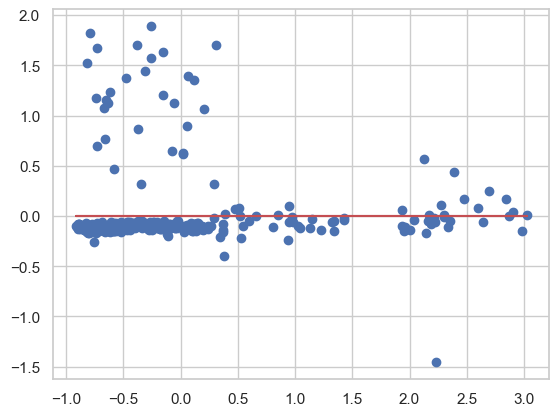

In [23]:
residuales2 = np.subtract(y_test, y_pred2.reshape(-1))        # subtract() resta los dos arrays
plt.scatter(y_pred2, residuales2);
y_values2 = np.zeros_like(y_pred2)
plt.plot(y_pred2,y_values2,"r");  

ANALSIS: Primero notamos que el R2 a aumentado cosiderablemente (mas de 85%) por tanto nos indica que el modelo a mejorado, ademas en la grafica de residiales podemos ver que los datos reales se aproximan mas a la linea rojo que representa la prediccion, el R2 y R2 ajustado varian mas respecto al modelo anterior, pero esto se debe principalmente a que tenemos mas variables en el modelo   
Ahora, podemos mejorar aun mas el modelo?   
Finalmente para intentar mejorar aun mas el modelo y llegar a una version final, analisamos con que variables si podemos trabajar en el modelo y cuales es mejor quitar

## Modelo final

Para llegar a la version final del modelo eliminamos las variables que no sean necesarias para el modelo, esto lo podemos hacer analizando el p values del stat.summary() y todas las variables con un p valor mayor a 0.05 las eliminamos y nos las consideramos para crear el modelo   
Por tanto solo voy a trabajar con las variables de = region_southwest, smoker_yes, age2, sobrepeso_fumador y children. Las demas no son consideradas para el modelo

In [24]:
# LLamado de la funcion para crear modelo
xcols = ["region_southwest","smoker_yes","age2","sobrepeso_fumador","children"]        # todas las columnas del data frame menos la variable a predecir
ycol = ["charges"]         # variable a predecir

model3, X_train, X_test, y_train, y_test, y_pred3 = modelo(df3,xcols,ycol)

In [25]:
mse3 = mean_squared_error(y_test, y_pred3) 
print("El error cuadrado promedio es = ", mse3)
r2_3 = r2_score(y_test, y_pred3)
print("El coeficiente de determinacion es = ", r2_3)

El error cuadrado promedio es =  0.1305708341437572
El coeficiente de determinacion es =  0.8727869337207578


In [26]:
model3.intercept_ = model3.intercept_[0]      # extraemos solo el valor de la intercepcion de la regresion lineal
model3.coef_ = model3.coef_.reshape(-1)       # coef tiene los coeficientes del modelo es decir los PESOS (w0,w1,w2,w3 ...)

y_test = y_test.reshape(-1)         # hace falta redimensionar para la lectura y analisis

print(stats.summary(model3, X_test, y_test, xcols))

Residuals:
    Min     1Q  Median     3Q    Max
-1.9458 0.0692  0.1113 0.1452 0.3363


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.003819    0.019897   0.1919  0.847920
region_southwest  -0.032553    0.020098  -1.6197  0.106241
smoker_yes         0.447318    0.023426  19.0952  0.000000
age2               0.320637    0.019368  16.5548  0.000000
sobrepeso_fumador  0.507564    0.024176  20.9942  0.000000
children           0.064207    0.020393   3.1484  0.001790
---
R-squared:  0.87279,    Adjusted R-squared:  0.87084
F-statistic: 448.70 on 5 features
None


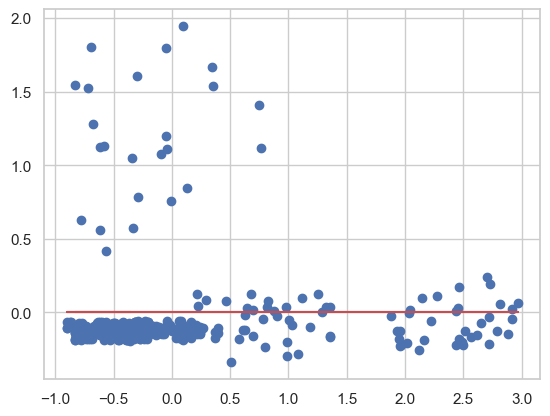

In [27]:
residuales3 = np.subtract(y_test, y_pred3.reshape(-1))        # subtract() resta los dos arrays
plt.scatter(y_pred3, residuales3);
y_values3 = np.zeros_like(y_pred3)
plt.plot(y_pred3,y_values3,"r");  

## Ultimo ajuste

En el modelo final podemos notar que al imprimir stats.summary() aun existen p values mayores a 0.05 (region_southwest), para este nuevo modelo, asi que podemos aliminarlos, ademas el intercepto no es una variable pero si es un parametro de la recta que tiene un p values mayor de 0.05, esto lo podemos eliminar con una instruccion dentro de la creacion del modelo, entonces para lograr esto no vamos a llamar a la funcion de creacion de codigo, ya que vamos a realizar cambios internos en esa funcion, entonces la volvemos a crear

In [28]:
xcols = ["smoker_yes","age2","sobrepeso_fumador","children"]        # todas las columnas del data frame menos la variable a predecir
ycol = ["charges"] 

X = df3[xcols].values
y = df3[ycol].values

# train_test_split recibe x,y y crea un paquete de 75% para entreno y 25% para prueba

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_x = StandardScaler().fit(X)     # valores de x estandarizados
sc_y = StandardScaler().fit(y)      # valores de y estandarizados

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model4 = LinearRegression(fit_intercept=False)      # Anulamos el intercepto
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [29]:
mse4 = mean_squared_error(y_test, y_pred4) 
print("El error cuadrado promedio es = ", mse4)
r2_4 = r2_score(y_test, y_pred4)
print("El coeficiente de determinacion es = ", r2_4)

El error cuadrado promedio es =  0.11586262453748578
El coeficiente de determinacion es =  0.8907689971858794


In [30]:
#model4.intercept_ = model4.intercept_[0]      # YA NO TENGO INTERCEPTO
model4.coef_ = model4.coef_.reshape(-1)       # coef tiene los coeficientes del modelo es decir los PESOS (w0,w1,w2,w3 ...)

y_test = y_test.reshape(-1)         # hace falta redimensionar para la lectura y analisis

print(stats.summary(model4, X_test, y_test, xcols))

Residuals:
    Min     1Q  Median     3Q   Max
-1.7621 0.0681  0.1072 0.1292 0.386


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.018689   0.0000  1.000000
smoker_yes         0.462521    0.024329  19.0110  0.000000
age2               0.324774    0.018193  17.8517  0.000000
sobrepeso_fumador  0.487852    0.023332  20.9092  0.000000
children           0.073225    0.019569   3.7419  0.000215
---
R-squared:  0.89077,    Adjusted R-squared:  0.88944
F-statistic: 668.70 on 4 features
None


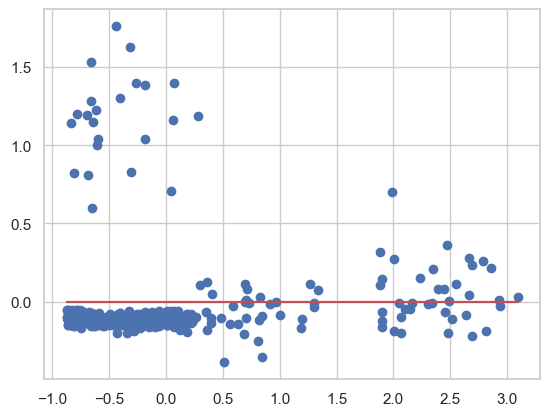

In [31]:
residuales4 = np.subtract(y_test, y_pred4.reshape(-1))        # subtract() resta los dos arrays
plt.scatter(y_pred4, residuales4);
y_values4 = np.zeros_like(y_pred4)
plt.plot(y_pred4,y_values4,"r");  

ANALISIS FINAL:  
A partir del segundo modelo existe mejoria considerable, es decir del primer modelo al segundo el R2 aumento mas de 10%, sin embargo los demas modelos creados, el model3 y model4, aumenta solo 1% o 2% de R2, entonces, ¿seran necesarios?           
FIN

## Ejecutando el modelo

In [45]:
entrada = pd.DataFrame({"smoker_yes":1,"age2":900,"sobrepeso_fumador":1,"children":0}, index=[0])         # asignamos los valores a las variables
entrada.head()

x = entrada[["smoker_yes","age2","sobrepeso_fumador","children"]].values

x_std = sc_x.transform(x)        # estandarizamos los valores de RM y INDUS

prediccion = model4.predict(x_std).reshape(-1,1)
prediccion = sc_y.inverse_transform(prediccion)

if entrada.iloc[0,0] == 1:
    text = "que fuma"
else:
    text = "que no fuma"

if entrada.iloc[0,2] == 1:
    text2 = "es fumador con sobre peso"
else:
    text2 = "no es fumador con sobre peso"

print(f"Una persona de {(entrada.iloc[0,1])**(0.5)} años, con {entrada.iloc[0,3]} hijos, {text} y que {text2} tiene una prediccion de gastos medicos en dolares de = ", prediccion[0,0])

Una persona de 30.0 años, con 0 hijos, que fuma y que es fumador con sobre peso tiene una prediccion de gastos medicos en dolares de =  37020.25018969603
